In [1]:
import urllib3
import json
import pandas as pd
from bs4 import BeautifulSoup
import requests
import re
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
from PIL import Image 
import collections
pd.set_option('display.max_row',500)
pd.set_option('display.max_columns',100)
pd.set_option('display.unicode.east_asian_width',True) 

In [2]:
Food_texts = pd.read_csv('./drink_categorization_data.csv') #음료 단어들로 구성된 데이터프레임을 불러옴 
Food_texts.head(10)
Food_texts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  348 non-null    int64 
 1   drink       348 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.6+ KB


In [3]:
Food_texts

,Unnamed: 0,drink
0,0,맥주
1,1,블랙 프라이 데잌 gomshushu BHC 곰슈슈
2,2,맥주
3,3,맥주
4,4,술
...,...,...
343,343,참이슬 치즈볼
344,344,콜라
345,345,맥주
346,346,소주


In [4]:
# Wordcloud 를 그리기 위해 onesentence 로 바꾸기
one_sentence=''
for i in range(len(Food_texts)):
    one_sentence += (' '+ Food_texts['drink'][i]) #사용할 컬럼명 설정
print(one_sentence)


 맥주 블랙 프라이 데잌 gomshushu BHC 곰슈슈 맥주 맥주 술 술 술 맥주 Fanta 맥주 맥주 맥주 맥주 맥주 맥주 맥주 치킨 콜라 사이다 와인 맥주 치킨 콜라 커피 쥬스 요거트 콜라 블랙알리오 주 스무디 맥주 맥주 치즈볼 쥬스 요거트 요거트 맥주 치킨 콜라 맥주 맥주 맥주 생맥주 생맥주 칵테일 칵테일 와인 맥주 얼그레이 크림 맥주 커피 콜라 카페라떼 와인 모닝커피 주스 맥주 술 맥주 맥주 소주 프라푸치노 추핫 코코넛 밀크 와인 와인 와인 와인 보드카 술 술 맥주 맥주 맥주 치즈볼 음료 음료 콜라 맥주 와인 와인 카페라떼 맥주 안주 크림 치즈볼 술 콜라 카페라떼 초코 맥주 치킨 콜라 치즈볼 술안주 치밥 와인 맥주 와인 소주 술 coffee americano 맥주 맥주 콜라 Wine 맥주 코카콜라 치킨 맥주 맥주 백피 조니워커 조니워커 조니워커 맥주 커피 맥주 맥주 치즈볼 코카콜라 후라이드 치킨 맥주 맥주 맥주 술 소주 맥주 술 맥주 맥주 아메리카노 아메리카노 커피 기프티콘 아메리카노 기프티콘 술 와인 레드와인 와인 포도주스 음료수 생맥주 칵테 일세 맥주 치즈스틱 치즈볼 뿌링클 코카콜라 소주 맥주 맥주 맥주 치즈볼 아메리카노 드립 커피 맥주 맥주 우유 칸쵸 치킨 콜라 소주 소주 토닉 워터 맥주 맥주 치즈볼 맥주 커피 우유 쥬스 소주 생맥주 위스키 맥주 맥주 커피 칵테일 소주 맥주 고량주 우유 우유 술 맥주 맥주 콜라 소주 참이 맥주 타락 커피 보리차 치퀸 생맥주 생맥주 케그 치즈볼 맥주 소주 맥주 음료수 보드카 토닉 워터 사이다 맥주 요거트 요거트 요거트 사이다 커피 맥주 맥주 맥주 버드와이저 요거트 맥주 맥주 맥주 치즈볼 뿌링클 맥주 자주 맥주 칵테일 소주 바나나 우유 치즈볼 맥주 맥주 콜라 쥬스 음료 버드와이저 맥주 우유 맥주 우유 드립커피 치즈볼 맥주 소주 카페라떼 요거트 요거트 맥주 술 맥주 맥주 커피우유 맥주 와인 커피 맥주 요거트 베이스 맥주 맥주 와인 와인 치킨 치즈볼 맥주 맥주 맥주 에어프라이어 맥주 소주 맥주 맥주 소주 와인 소주 아메

In [6]:
#폰트 파일 다운 
fontpath = './이쁜폰트.ttf'

In [7]:
tokened_content_words = one_sentence.split(' ')

In [8]:
textdict = collections.Counter(tokened_content_words)

In [9]:
#모양 이미지 다운 
mask = np.array(Image.open("./up.jpg"))

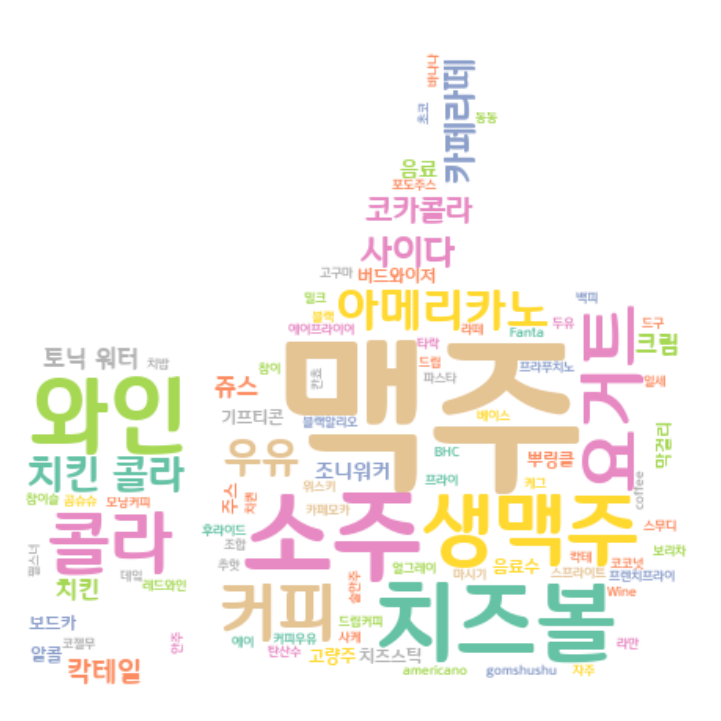

In [14]:
#wordcloud 그리기 
wordcloude_img = WordCloud(background_color = 'white', max_words=100, font_path=fontpath,mask=mask,colormap='Set2').generate(one_sentence)
plt.figure(figsize=(15,13))
plt.imshow(wordcloude_img, interpolation='bilinear')
plt.axis('off')
plt.show()